# 7: Hypothesis Testing: 

These problems are provided as Jupyter notebooks, so that you can edit your own version and include some simple calculations. You don't have to - you can do your own calculations any way you like - but it will get you used to doing statistics calculations with Python, which will gradually be more powerful in later weeks.


This is the version with solutions.

**Python setup**

Once again, lets start by loading up some standard Python modules.

In [2]:
from math import *  # basic maths routines
import numpy as np  # more advanced maths routines
from scipy import stats # stats routines, e.g. binomial and Poisson distributions

# Level 1 Problems: simple calculations
These are what you might call "plug-in" problems. If you identify the concept or key formula that applies, it should be a fairly simple calculation to get the right answer.

### P7.1 Gaussian significance  (L1)
A measurement $x$ is made which should be the result of sampling from a population distribution with $\mu=14.0$ and $\sigma=2.3$. A data value of $x=18.2$ is found. What is the probability of finding a value (i) at least as large as $x$? (ii) at least as far as $x$ from the mean? In either of these cases, is there significant evidence for a discrepancy at 5% significance?

**Solution** First find $z=(x-\mu)/\sigma$ then, either from tables or Python etc, get the probability of $P(>z)$. Case (ii) will be double, because the Gaussian is symmetric.

In [3]:
mu=14.0
sig=2.3
x=18.2
z=(x-mu)/sig; print("z value is ", round(z,2))
P1=stats.norm.sf(z,0,1); P2=2.*P1
print("one tailed P=",round(P1,3))
print("two tailed P=",round(P2,3))

z value is  1.83
one tailed P= 0.034
two tailed P= 0.068


 Case (i) would pass 5% significance, but case (ii) does not

### P7.2 Dodgy coin likelihood (L1)
You have a coin, which you assume is a fair one. However a colleague has suggested that the coin is cunningly weighted, so that heads comes up half as often as it should. You have no idea whether they are right. You toss the coin, and it turns up heads. What is the Likelihood of getting heads, on each hypothesis? Would you change your assessment of whether your colleague is right, (i) on a significance basis, (ii) on a Bayesian basis?

**Solution** 
Hypothesis A: Likelihood of Heads is 0.5  
Hypothesis B: Likelihood of Heads is 0.25

On a significance basis, you would start by assuming your colleague is wrong - i.e. that is the null hypothesis. You wouldn't change your mind when you see heads, because getting heads is pretty likely on the null hypothesis!
Meanwhile, your colleague might take B as the null hypothesis, and he will see no reason change his mind either.

On a Bayesian basis, you would both start by giving both hypotheses a prior probability of 0.5. When you see heads, you *would* adjust these, using the Bayesian updating formula - the "fair coin" hypothesis would slightly improve. (No need for actual calculation).


### P7.3 Assessing a hypothesis with $\chi^2$  (L1)
An experiment with seven measurements compares each to a specific predicted value with known variance and gets a $\chi^2$ value of 16.3. If the predicted value is correct, what is the probability of getting at least that value of $\chi^2$? Would you reject the null hypothesis, that the predicted value is correct?

**Solution** 16.3 is quite a lot bigger then the "expected if hypothesis is true" value of 7.  So we need to calculate $P(>\chi^2)$ for $\nu=7$ degrees of freedom:

In [4]:
nu=7
csq=16.3
P=stats.chi2.sf(csq,nu)
print("prob >chisq=",round(P,3))

prob >chisq= 0.023


Whether to reject the null hypothesis depends on the significance level that you should have chosen in advance! You would reject at 5\% significance but not at 1\%

# Level 2 Problems: formulating problems
These are more like real-world problems. The key skill is being able to translate a physical description into appropriate mathematics, and then identifying the concepts and formulae you need to apply. Sometimes at that point its a straightforward calculation, but more often you need a bit more mathematical manipulation, keeping the physical meaning in mind, and then finally calculating.   

### P7.4 Arguments about the Yotta particle (L2)
A lab measures the mass of the Yotta particle as a test of their equipment, as it should give m = 1375 GeV, and if their equipment is working as expected, each measurement should have a Gaussian error σ = 65 GeV. They make four measurements, which give 1326, 1376, 1422, and 1512 GeV respectively. Consider these two different scenarios, using a 5% significance z-test: 

(a) Before looking at the results, one of the scientists involved has claimed that there was a problem with the equipment on the fourth measurement, likely to make the value too high. When the results come out, do they support this suggestion? 

(b) After the results come out, the high value on the fourth measurement is spotted, which makes the experimental team concerned that there is a problem with the equipment. Do the data values support this suggestion?

(c) Assuming we accept the data, how confident are we about the prediction?

**Solution** This is a good example of why you need a clear alternative hypothesis, as well as a null hypothesis. In both cases, the null hypothesis is that all four points are drawn from the same Gaussian with $\mu = 1375$ and $\sigma = 65$. However, the alternatives are quite different.

(a) In the first case,  we are  restricting our attention to a single point, and furthermore, expecting it to be high, then we can use the one-tailed Gaussian z-test. A point at 1512 compared to mean 1375 and error 65 is at a deviation of z = 2.11. From the calculation below, we see that we would indeed reject the null hypothesis at 5% significance.

In [20]:
data=[1326,1376,1422,1512]
samplemu=np.mean(data)
samplestd=np.std(data)
hypothesismu=1375
hypothesissigma=65
print("Predicted Mean: 1375+-65; Sample Mean: ",round(samplemu,4),"+-",round(samplestd), " Dodgy point:",data[3])

z= (data[3]-1375)/65 #2.11
P=stats.norm.sf(z,0,1)
print("Z-statistic for the dodgy point z=",round(z,3),'probability of this or higher is P=',round(P,4))

Predicted Mean: 1375+-65; Sample Mean:  1384.0 +- 38  Dodgy point: 1412
Z-statistic for the dodgy point z= 0.569 probability of this or higher is P= 0.2846


(b) If we are prepared to be interested in any discrepant point, there are two subtleties. The first is that although we spotted a high point, we would have been equally concerned if we had seen a low point. The probability of seeing *either* a high *or* a low point is twice as big, $P = 0.035$. The second subtlety is that we would have been impressed by seeing any of the four points being discrepant. So  we have to ask “whats the probability of seeing at least one discrepant point out of four?”. To get that, we want ask what is the probability that four in a row are all *not discrepant* ($(1-p)^4$) and then do one minus that.

With p = 0.035 and n = 4 we have P(≥ 1) = &1−(1−p)^4$ = 0.14. So there is roughly a 14% chance of getting at least one dodgy-looking point, which would not cause us to reject the null hypothesis.

In [21]:
P1=2.*stats.norm.sf(z,0,1)
P4=1. - (1-P1)**4
print("P4=",round(P4,3))

P4= 0.966


(c) Now we do a full chi-squared-test of the data.  This will show that although the one point contributes the most  to chi-squared, overall the hypothesis is reasonable

In [23]:
chi2stat=0
for i in (data):
    chi2stat+=((i-hypothesismu)/hypothesissigma)**2
    print(i, "contribution to chi-2", ((i-hypothesismu)/hypothesissigma)**2)
print("chi-2 statistic ",chi2stat)
print("Confidence that the data fits  the hypothesis is", 100*(1-stats.chi2.cdf(chi2stat,4)) , "%")

1375 contribution to chi-2 0.0
1375 contribution to chi-2 0.0
1375 contribution to chi-2 0.0
1375 contribution to chi-2 0.0
chi-2 statistic  0.0
Confidence that the data fits  the hypothesis is 100.0 %


### P7.5 Using Bayes to test Fred versus Jane (L2)

For an exercise class in statistics, a technician has fetched from the lab an urn containing coloured balls. You know that there are two of these urns - urn A has 10 red balls and 20 black balls; urn B has 15 red balls and 15 black balls - but you don’t know which one the technician has fetched. One of the tutors, Fred, claims with confidence that the technician fetched urn A; but Jane claims with equal confidence that urn B was fetched. You have no particular reason to trust Jane more than Fred or vice versa. You do a test run, picking out three balls in succession, replacing the ball each time. All three picks give red balls. On a Bayesian basis, how does this change your view of whether Fred or Jane is most likely to be right? Fred then insists you try again, and you pick out two black balls in succession. What now is the probability that Jane is right?

**Solution** Lets set up some symbols and facts to use.

F = Fred’s hypothesis, 10 red 20 black    
J = Jane’s hypothesis, 15 red 15 black    
We start by assuming equal prior credibility: $\pi_F = \pi_J = 1/2$.


Data point 1: $D$ = 3 reds out of 30   
On Fred's hypothesis: Likelihood $L_F = (10/30)^3 = 1/27$    
On Jane's hypothesis: Likelihood $L_J = (15/30)^3 = 1/8$     
**note** balls are replaced...

Marginalised likelihood:  
$$E=L_F\pi_F +L_J\pi_J = \frac{1}{27}\cdot\frac{1}{2} + 
\frac{1}{8}\cdot\frac{1}{2} = \frac{35}{27\times 16} $$


Updated posteriors are then 

$$ P_F = \pi_F \cdot \frac{L_F}{E} = \frac{1}{2}.\frac{1}{27}.\frac{27\times 16}{35}
=\frac{8}{35} $$

$$ P_J = \pi_J \cdot \frac{L_J}{E} = \frac{1}{2}.\frac{1}{8}.\frac{27\times 16}{35}
=\frac{27}{35} $$

So Jane is now three times as credible as Fred, but either hypothesis is far from ruled out at any sensible confidence level. Note that the posteriors add up to 1.0. For the second experiment, we can use these posteriors as the new priors: $\pi_F = 8/35$ and $\pi_J = 27/35$.

Data point 2: two blacks out of 30.  
$L_F = (2/3)^2 = 4/9 $ and $L_J=(1/2)^2 = 1/4$

Then $E=L_F\pi_F +L_J\pi_J = (8/35).(4/9) + (27/35).(1/4) =0.294$


Updated posteriors are then 

$$ P_F = \pi_F \cdot \frac{L_F}{E} = \frac{8}{35}.\frac{(4/9}{0.294}= 0.345 $$

$$ P_J = \pi_J \cdot \frac{L_J}{E} = \frac{27}{35}.\frac{(1/4}{0.294}= 0.655 $$

The odds have improved in Fred's favour, but Jane is still more likely to be right. 
You can imagine that as we add more and more data, this oscillation would stop, and it would gradually become more and more clear who was right.

### P7.6 Faulty mosquito repellent
In problem sheet 5 question 4 we considered a mosquito spray with 75% effectiveness, and found that the probability of killing at least 70 out of 100 mosquitos was approximately 88\%. (Depending on how you approximate the Gaussian to the binomial). Suppose someone suspects that the batch of spray being used is faulty. Would you consider seeing only 70 deaths out of 100 evidence that the batch is faulty, at either 95% or 99% confidence? Suppose instead we had seen 65 deaths? What if we tested on 1000 mosquitos and saw 650 deaths?

**Solution**  The null hypothesis is that the spray works as expected.  
Probability per trial $p=0.75$   
Number of trials $n=100$  
Expected kills $\mu= np = 75$   
Standard deviation is $\sigma = \sqrt{np(1-p)} = 4.33$  
Use the Gaussian approx. with same $\mu$ and $\sigma$  
Seeing $x=70$ is $z=(70-75)/4.33 = 1.15$  
The person suggesting the batch is faulty has not said in *which way* it is faulty; we would potentially be impressed by either an unexpectedly small or an unexpectedly large value. So we should do a two-tailed test.

In [7]:
z=1.15
P70=2.*stats.norm.sf(z,0,1)
print("probability from two tailed test=",round(P70,3))

probability from two tailed test= 0.25


So seeing $x=70$ is nothing unusual at all. What about $x=65?$ That is $z=-2.31$

In [8]:
z=2.31
P65=2.*stats.norm.sf(z,0,1)
print("probability from two tailed test=",round(P65,3))

probability from two tailed test= 0.021


So in this case we would pass a 95% confidence test but not a 99% confidence test. So now about $n=1000$ and $x=650$?   
Now $\mu=750$ and $\sigma=\sqrt{np(1-p)}=1.369$. But $z=(650-750)/13.69 = -7.30$

In [9]:
z=7.30
P650=2.*stats.norm.sf(z,0,1)
logP650=log10(P650)
print("log probability from two tailed test=",round(logP650,2))

log probability from two tailed test= -12.54


That is a highly significant result, for the same *fraction* of deaths. Just shows you how important sample size is!

### P7.7 Distinguishing theories (L2)
An experiment is measuring Thorium decays. The standard theory predicts a decay rate of 0.35 s$^{-1}$.
A new theory predicts 0.37 s$^{-1}$. How long do we need to run the experiment to distinguish the two theories at 95% confidence?

**Solution** The experiment running for time $t$ will produce some number of decays $N(t)$.  The standard theory predicts $N_0(t)=0.35t$. the new theory $N_1(t)=0.37t$.
First, make a rough estimate - this is a Poisson process, so the standard deviation is $\sqrt{0.36t}$, and we need the error on the mean to be less than $0.01t$, so roughly 
 $$  N = 0.36/0.0001=3600 $$
So $t \sim 3600/0.36 = 10000$  

Now in more detail... 

We can apply a z-test  (z=1.96 is 95\%) to the difference $N_1-N_0$.  The variance of these two distribution is just the sum of their variances $\sigma=N_1+N_0$, so 

$$z=\frac{(0.37-0.35)t}{\sqrt{(0.37+0.35)t}}=1.96$$

Which solves to give $t=6915s$


Now lets simulate the process: we will run many iterations generating particles at 0.35 and 0.37 per second and plot the distributions. 

In the absence of better idea, we will prefer the theory closest to the data.  So the risk of wrongly accepting the standard theory is
$$\int_0^{0.36t} p_1(N)dN$$
and the risk of wrongly accepting the new theory is
$$\int_{0.36t}^\infty p_0(N)dN$$


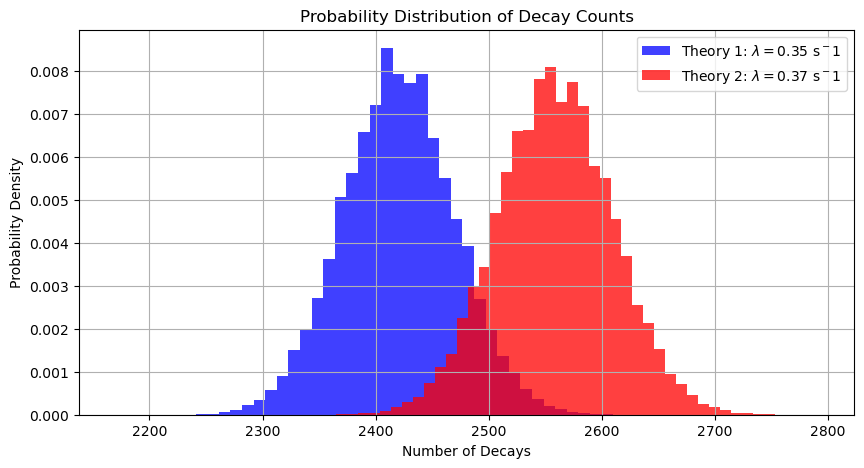

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_1 = 0.35  # decay rate per second for theory 1
lambda_2 = 0.37  # decay rate per second for theory 2
time_point = 6915  # large single time point to simulate (in seconds)
iterations = 1000000  # number of iterations/samples

# Generate decay counts at the large time point using the Poisson distribution
decays_1 = np.random.poisson(lambda_1 * time_point, size=iterations)
decays_2 = np.random.poisson(lambda_2 * time_point, size=iterations)

# Create a histogram to visualize the distributions
plt.figure(figsize=(10, 5))
plt.hist(decays_1, bins=50, alpha=0.75, label=f'Theory 1: $\lambda = {lambda_1}$ s$^{-1}$', color='blue', density=True)
plt.hist(decays_2, bins=50, alpha=0.75, label=f'Theory 2: $\lambda = {lambda_2}$ s$^{-1}$', color='red', density=True)
plt.xlabel('Number of Decays')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Decay Counts')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Level 3 Problems: needs some thought

These problems are not so straightforward, needing a little more careful thought or imagination. Sometimes the trick or insight is quite simple, and sometimes its quite hard! Often, these problems force you to think more carefully about the fundamentals, or question your assumptions, to avoid falling into traps.

### P7.8 Suspiciously above the line (L3)
You are fitting a curve to some data points (You will have seen how to do this in week 1,). You are not sure how to calculate the error bars, but notice that five out of six points lie above the line, which makes them suspicious. Is this in itself enough to make them reject the fit? 

**Solution** (a) The null hypothesis is that the fitted line correctly describes the data points. We are not told the probability distribution (i.e. error bar) for each data point, but the insight is to realise that in the absence of more complete knowledge, we should consider that each point has an *equal chance* of being above or below the line. So its like tossing a coin six times. Being above the line is “success” with p = 1/2. With n = 6 trials, what is the probability of $x$ or $x=6$?

Actually, you probably would have been equally impressed with 5 below the line, so we should use a two tail test and double that probability.

In [26]:
n=6; p=0.5
P=stats.binom.pmf(5,n,p) + stats.binom.pmf(6,n,p)
print("prob of at least 5 above the line:",round(P,3),"One-tail test")

print("prob of at least 5 above or at least 5 below:",round(2*P,3),"Two-tail test")

prob of at least 5 above the line: 0.109 One-tail test
prob of at least 5 above or at least 5 below: 0.219 Two-tail test


So thats not at all convincing.

### P7.9 Small $\chi^2$ values (L3)
We normally expect that a poor hypothesis, or incorrect parameter value, will give a value of $\chi^2$ larger than the mean value expected for a good hypothesis, $\chi^2 \sim \nu$;  values smaller than $\nu$ will just occur by chance sometimes for any acceptable hypothesis. However, experimenters sometimes find that consistently small values of $\chi^2$  keep appearing in their data analysis, more often than ought to happen by chance. What do you think might be causing this problem?

**Solution** The most common way this can happen is if the experimentalists have overestimated their error bars for some reason. Remembering that $\chi^2= \sum{(x_i-\mu)^2/\sigma_i^2}$ you can see how this happens.

### P7.10 Posterior -  $\chi^2$ relation (L3)
Consider N data points, all with the same error σ, assumed to represent a Gaussian standard deviation. The data points are thought to have a common mean $\mu$, and you are using the data points to estimate $\mu$. Show that the standard $\chi^2$ statistic, the prior credibility density $\pi$ and the posterior credibility density $P$ are related by

$$\ln{P(\mu)} = {\rm\; const\;} +\ln{\pi(\mu)} - \frac{1}{2} \chi^2(\mu)$$

In approximate terms, what would need to be the case for the minimum $\chi^2$ estimate of $\mu$ to be close to the same as the maximum posterior estimate?

**Solution** Credibility and Likelihood are linked by the normalisation factor E
$$P(\mu) = \frac{L(D|\mu)}{E}$$

Each data point is drawn from the same Gaussian, so the joint Likelihood is

$$L(\mu) = \left( \frac{1}{\sigma\sqrt{2\pi}} \right)^N 
\exp\left[  -\sum{\frac{1}{2}
\left( \frac{x_i - \mu}{\sigma} \right)^2}
\right] $$

Taking logs we get

$$ \ln L(\mu) = -N \ln(\sigma\sqrt{2\pi})
-\frac{1}{2} \sum{\left(  \frac{x_i-\mu}{\sigma} \right)^2}
= {\rm\; const\;} - \frac{1}{2} \chi^2(\mu)$$

Taking logs of the Bayes formula, we have $\ln P(\mu) = \ln\pi(\mu) + \ln L(\mu) - \ln E$ and we note that $E$ is a constant, i.e. not a function of $\mu$. Combining these results, we get

$$\ln P(\mu) = {\rm\; const\;} + \ln\pi(\mu) - \frac{1}{2} \chi^2(\mu)$$

as required. For the minimum of $\chi^2$ to be in roughly the same place as the maximum of $P$, we need $\pi(\mu)$ to change more slowly than $\chi^2(\mu)$, i.e.   it can be seen as an approximately uniform prior in the region of interest.